Citation Request:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

1. Title: Forest Fires

2. Sources
   Created by: Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007
   
3. Past Usage:

   P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
   In Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, 
   December, 2007. (http://www.dsi.uminho.pt/~pcortez/fires.pdf)
   
   In the above reference, the output "area" was first transformed with a ln(x+1) function.
   Then, several Data Mining methods were applied. After fitting the models, the outputs were
   post-processed with the inverse of the ln(x+1) transform. Four different input setups were
   used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
   regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
   with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
   12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
   best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
   (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
   the SVM model predicts better small fires, which are the majority. 
 
4. Relevant Information:

   This is a very difficult regression task. It can be used to test regression methods. Also,
   it could be used to test outlier detection methods, since it is not clear how many outliers
   are there. Yet, the number of examples of fires with a large burned area is very small.

5. Number of Instances: 517 

6. Number of Attributes: 12 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

8. Missing Attribute Values: None


The Fine Fuel Moisture Code (FFMC) represents fuel moisture of forest litter fuels under the shade of a forest canopy. It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. ... It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels


DMC (duff moisture code) is a numerical rating of the average content of loosely compacted organic layers of moderate depth and is derived from temperature, relative humidity and rain. The DMC has been used as an indicator of fire extinguishment 

What is the DC index?
The Drought Code (DC), much like the Keetch-Byrum Drought Index, represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels. It is unitless, with a maximum value of 1000

The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.

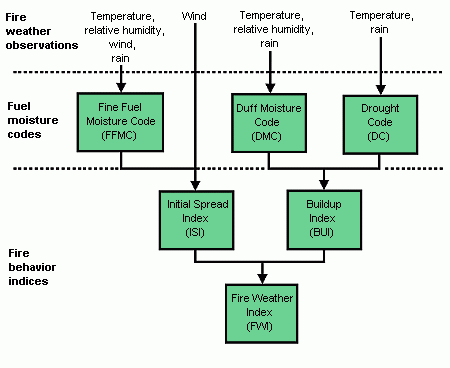

### Import all relevant libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

### Reading the data and inspecting the attributes/features

In [1330]:
df = pd.read_csv('forestfires.csv')

In [37]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
df.shape

(517, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [12]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Exploratory Data Analysis

<AxesSubplot:xlabel='area', ylabel='Density'>

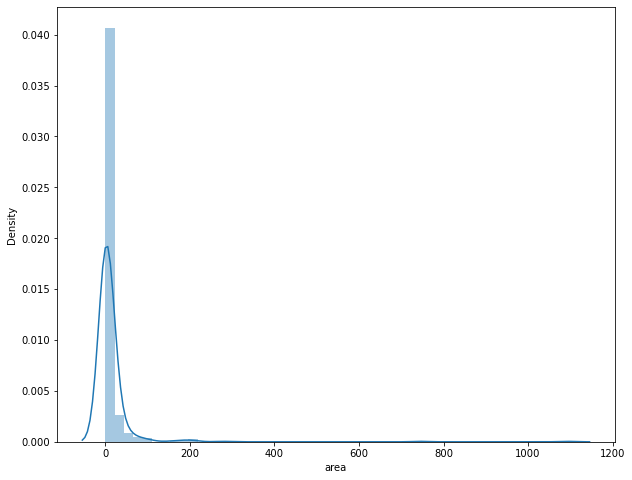

In [31]:
# Which values of burned areas are common in Portugal
plt.figure(figsize=(10,8))
sns.distplot(df['area'])

#### Finding which months had the highest temperatures and mean burned areas


In [1464]:
data = df.groupby('month')[['temp', 'area']].mean()
data.head()

,temp,area
month,,
apr,12.044444,8.891111
aug,21.631522,12.489076
dec,4.522222,13.330000
feb,9.635000,6.275000
jan,5.250000,0.000000


[Text(0.5, 1.0, 'Month Countplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Number of records')]

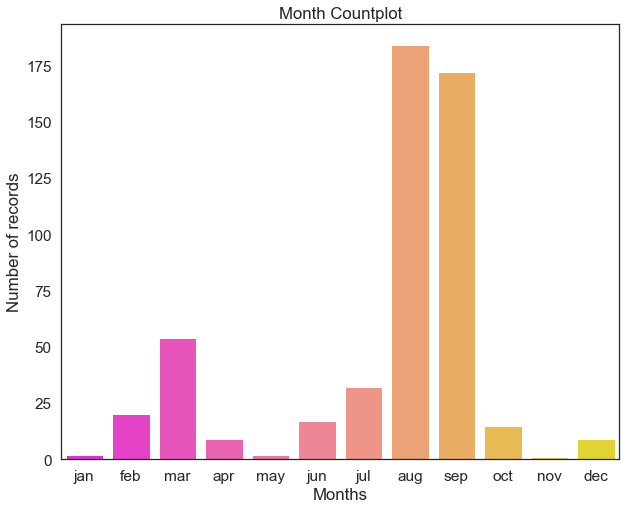

In [1459]:
plt.figure(figsize=(10,8))
sns.set(style='white', font_scale=1.4)
day_plot = sns.countplot(df['month'],  order = ['jan', 'feb', 'mar', 'apr', 
                                  'may', 'jun', 'jul', 'aug', 
                                  'sep', 'oct', 'nov', 'dec'], palette='spring')
day_plot.set(title='Month Countplot', xlabel='Months', ylabel='Number of records')

[Text(0.5, 1.0, 'Month Vs Avg Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

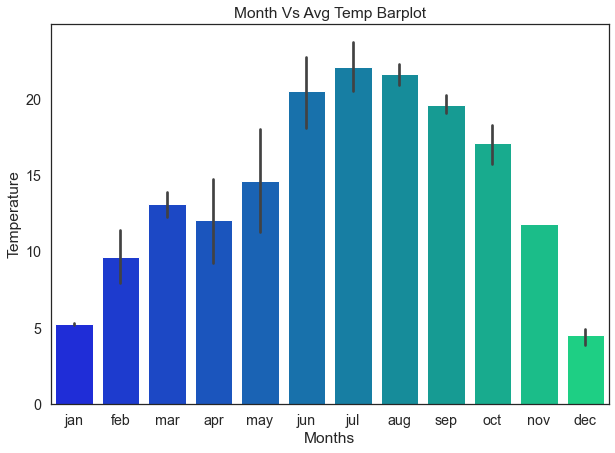

In [1461]:
plt.figure(figsize=(10,7))

sns.set(style = "white", font_scale = 1.3)
ax_1 = sns.barplot(x = 'month', y = 'temp', data = df,
                         order = ['jan', 'feb', 'mar', 'apr', 
                                  'may', 'jun', 'jul', 'aug', 
                                  'sep', 'oct', 'nov', 'dec'], palette = 'winter')

ax_1.set(title = "Month Vs Avg Temp Barplot", xlabel = "Months", ylabel = "Temperature")

In [1465]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['area'] = scaler.fit_transform(np.array(data['area']).reshape(-1,1))

In [1466]:
data

,temp,area
month,,
apr,12.044444,0.462116
aug,21.631522,0.649120
dec,4.522222,0.692827
feb,9.635000,0.326143
jan,5.250000,0.000000
jul,22.109375,0.746865
jun,20.494118,0.303595
mar,13.083333,0.226438
may,14.650000,1.000000


In [1467]:
data = data.sort_values(by='area')

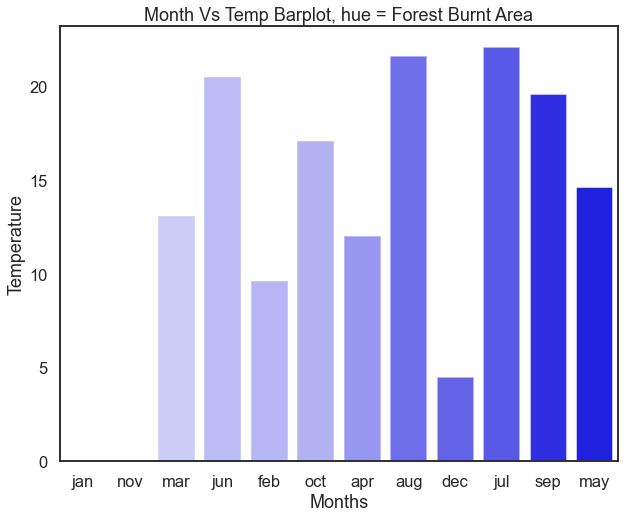

In [1468]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')
plt.figure(figsize=(10,8))
ax = sns.barplot(x=data.index, y='temp', data=data, color='blue')

for bar, alpha in zip(ax.containers[0], data['area']):
    bar.set_alpha(alpha)
    
ax.set(title = "Month Vs Temp Barplot, hue = Forest Burnt Area", xlabel = "Months", ylabel = "Temperature")
plt.show()

In [1447]:
data = df.groupby('day')[['temp', 'area']].mean()

In [1448]:
data.head()

,temp,area
day,,
fri,17.948235,5.261647
mon,16.951351,9.547703
sat,19.348810,25.534048
sun,19.065263,10.104526
thu,19.704918,16.345902


[Text(0.5, 1.0, 'Day Vs AVG Temp Barplot'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Temperature')]

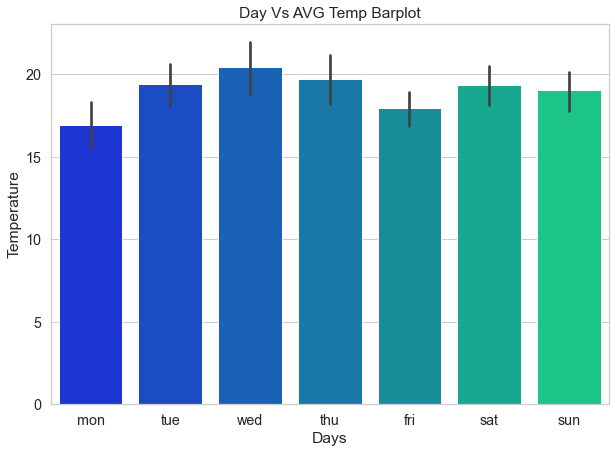

In [1436]:
plt.figure(figsize=(10,7))

sns.set(style = "whitegrid", font_scale = 1.3)
ax_1 = sns.barplot(x = 'day', y = 'temp', data = df,
                         order = ['mon', 'tue', 'wed', 'thu', 
                                  'fri', 'sat', 'sun'], palette = 'winter')

ax_1.set(title = "Day Vs AVG Temp Barplot", xlabel = "Days", ylabel = "Temperature")

In [1453]:
data['area'] = scaler.fit_transform(np.array(data['area']).reshape(-1,1))

In [1449]:
data.reset_index(inplace=True)

In [1454]:
data = data.sort_values(by='area')

In [1455]:
data

,day,temp,area
0,fri,17.948235,0.000000
1,mon,16.951351,0.211423
3,sun,19.065263,0.238890
6,wed,20.427778,0.268995
5,tue,19.439062,0.363059
4,thu,19.704918,0.546766
2,sat,19.348810,1.000000


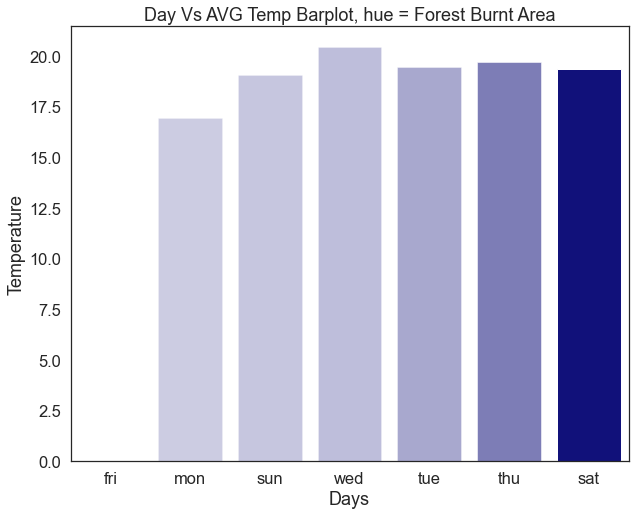

In [1457]:
plt.figure(figsize=(10,8))
sns.set(style='white', font_scale=1.5)
ax = sns.barplot(x='day', y='temp', data=data, color='darkblue')

for bar, alpha in zip(ax.containers[0], data['area']):
    bar.set_alpha(alpha)
    
ax.set(title = "Day Vs AVG Temp Barplot, hue = Forest Burnt Area", xlabel = "Days", ylabel = "Temperature")
plt.show()

[Text(0.5, 1.0, 'Day Countplot'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Number of records')]

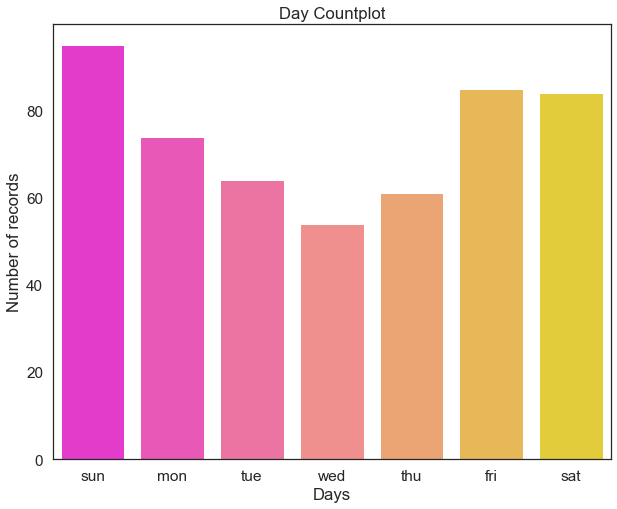

In [1458]:
plt.figure(figsize=(10,8))
sns.set(style='white', font_scale=1.4)
day_plot = sns.countplot(df['day'],  order = ['sun', 'mon', 'tue', 'wed', 'thu', 
                                  'fri', 'sat'], palette='spring')
day_plot.set(title='Day Countplot', xlabel='Days', ylabel='Number of records')

In [208]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [210]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [211]:
pairplot_data = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']]

<Figure size 1440x1440 with 0 Axes>

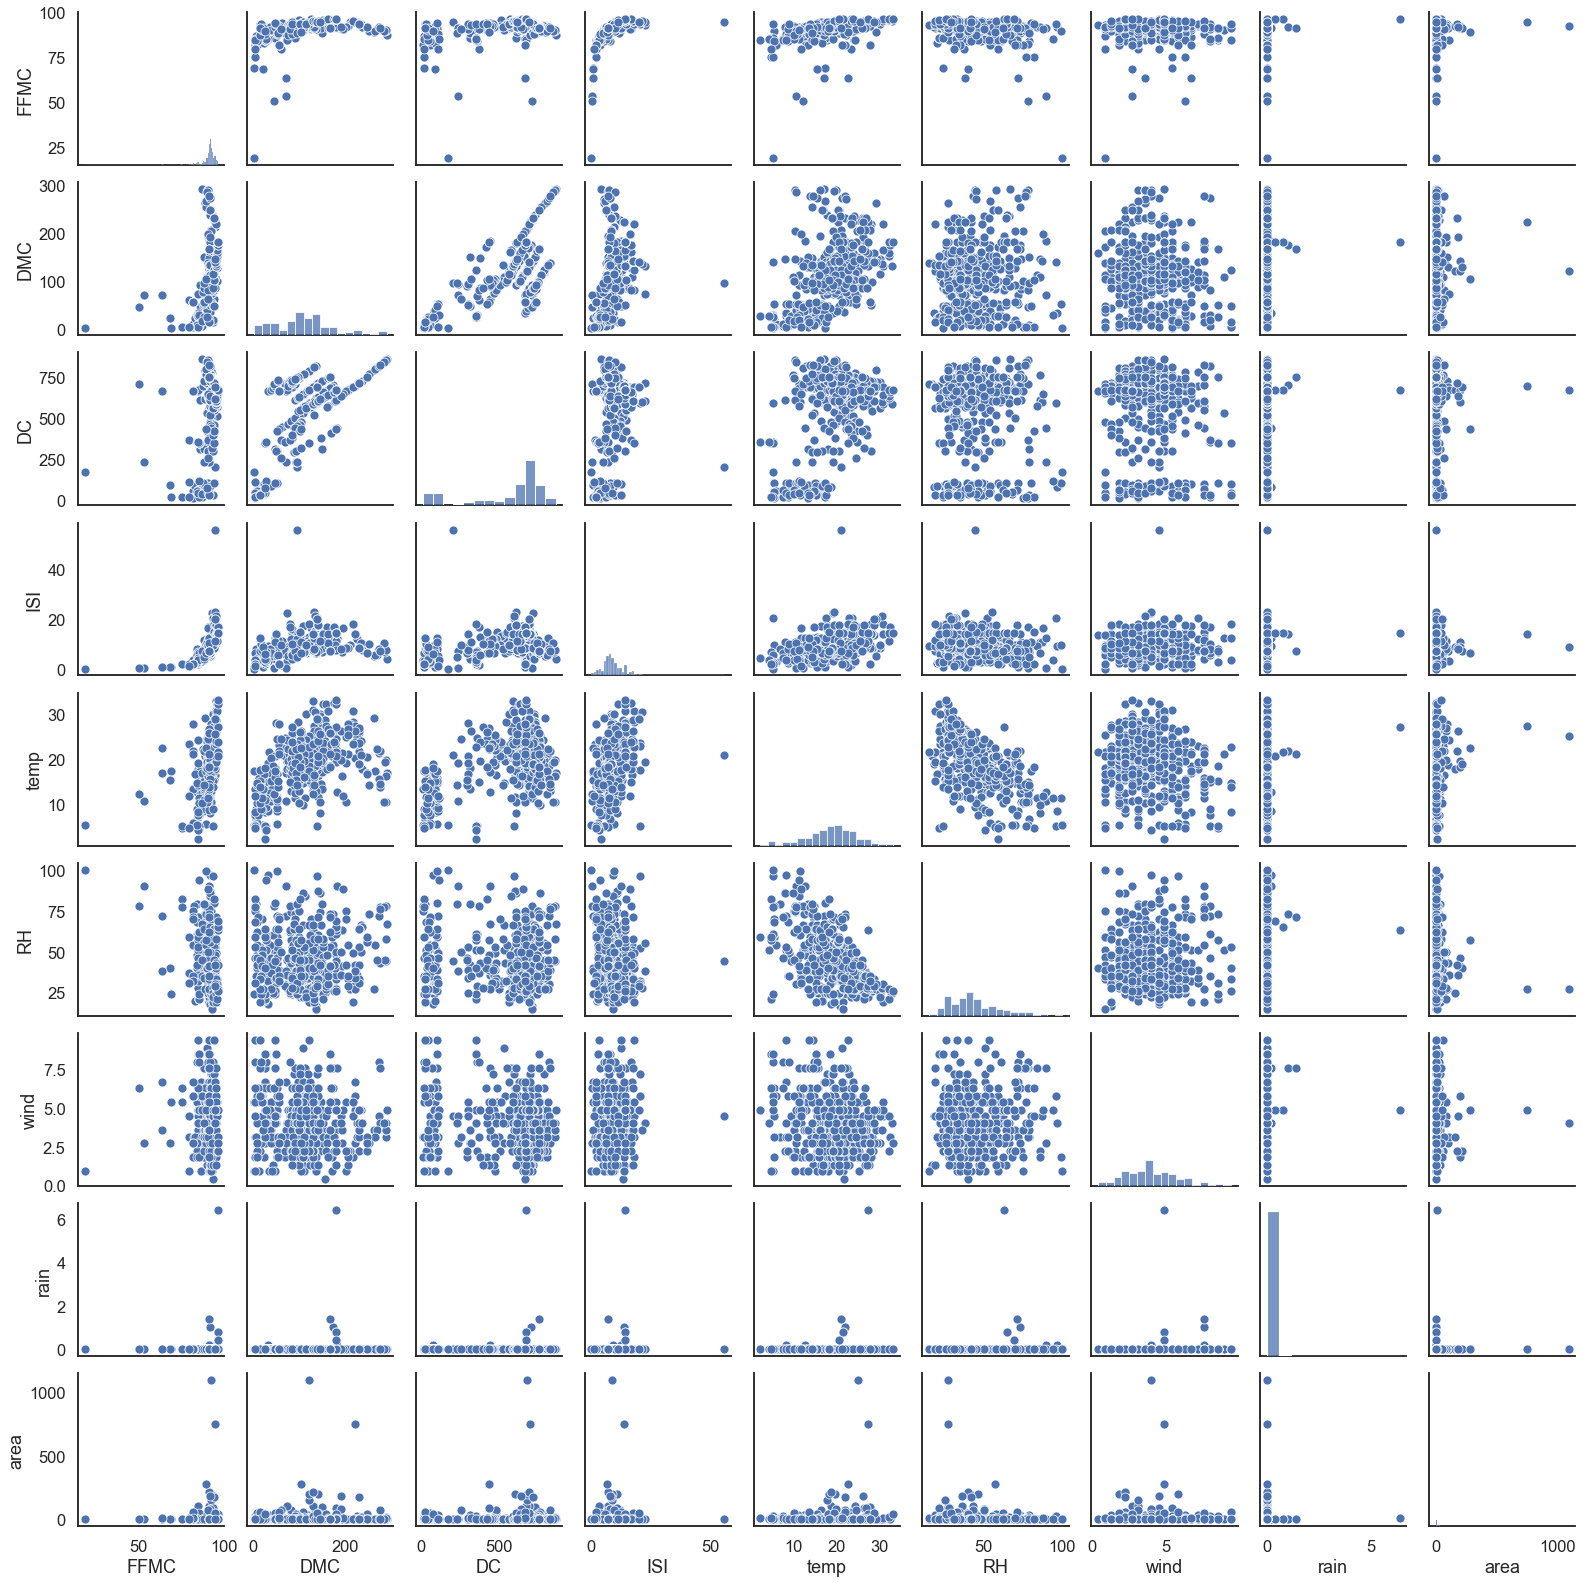

In [213]:
sns.set_context('talk')
sns.set_style('white')

plt.figure(figsize=(20,20))
sns.pairplot(pairplot_data)

In [214]:
# Based on the pairplot above, temperature and relative humidity along with DMC and DC have some correlation - need to avoid 
# multicollinearity

[Text(0.5, 1.0, 'Temperature VS Humidity')]

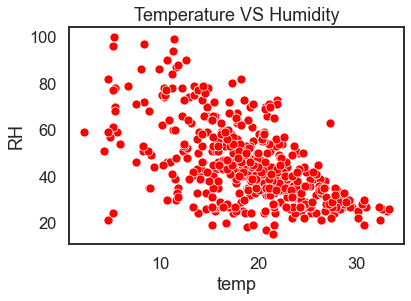

In [226]:
s = sns.scatterplot(x='temp', y='RH', data=df, color='red')
s.set(title='Temperature VS Humidity')

[Text(0.5, 1.0, 'Moisture VS Drought')]

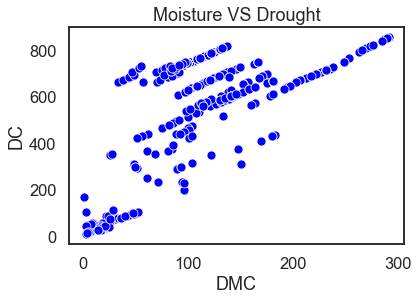

In [228]:
s = sns.scatterplot(x='DMC', y='DC', data=df, color='blue')
s.set(title='Moisture VS Drought')

<AxesSubplot:>

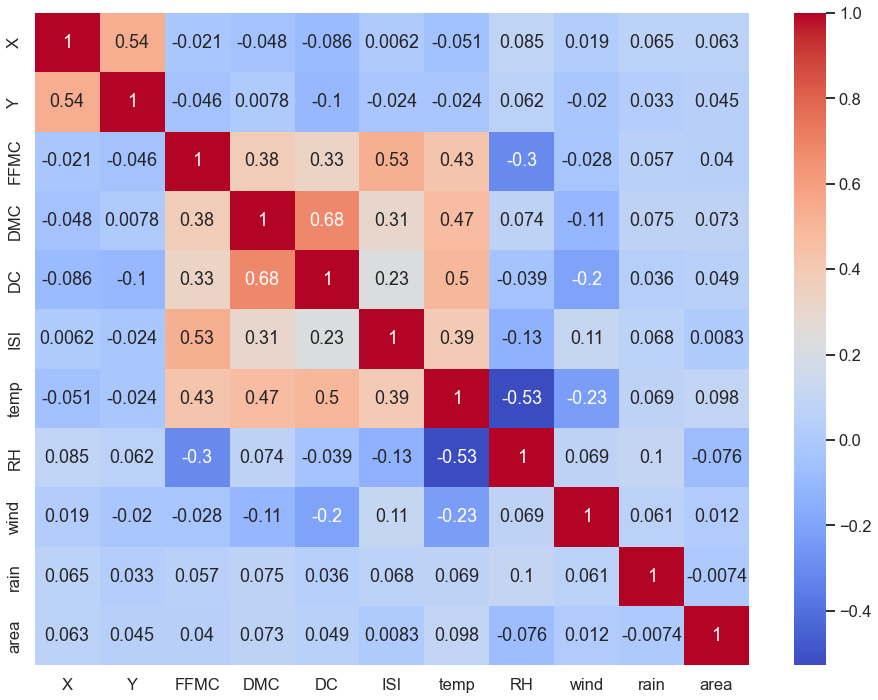

In [238]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

#### Visualizing all numerical columns

### Dropping correlated columns

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [252]:
col_nums = df.select_dtypes(include='number').iloc[:, 2:]

In [257]:
np.ravel(axes)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:xlabel='FFMC', ylabel='Count'>],
      dtype=object)

### After log transformation

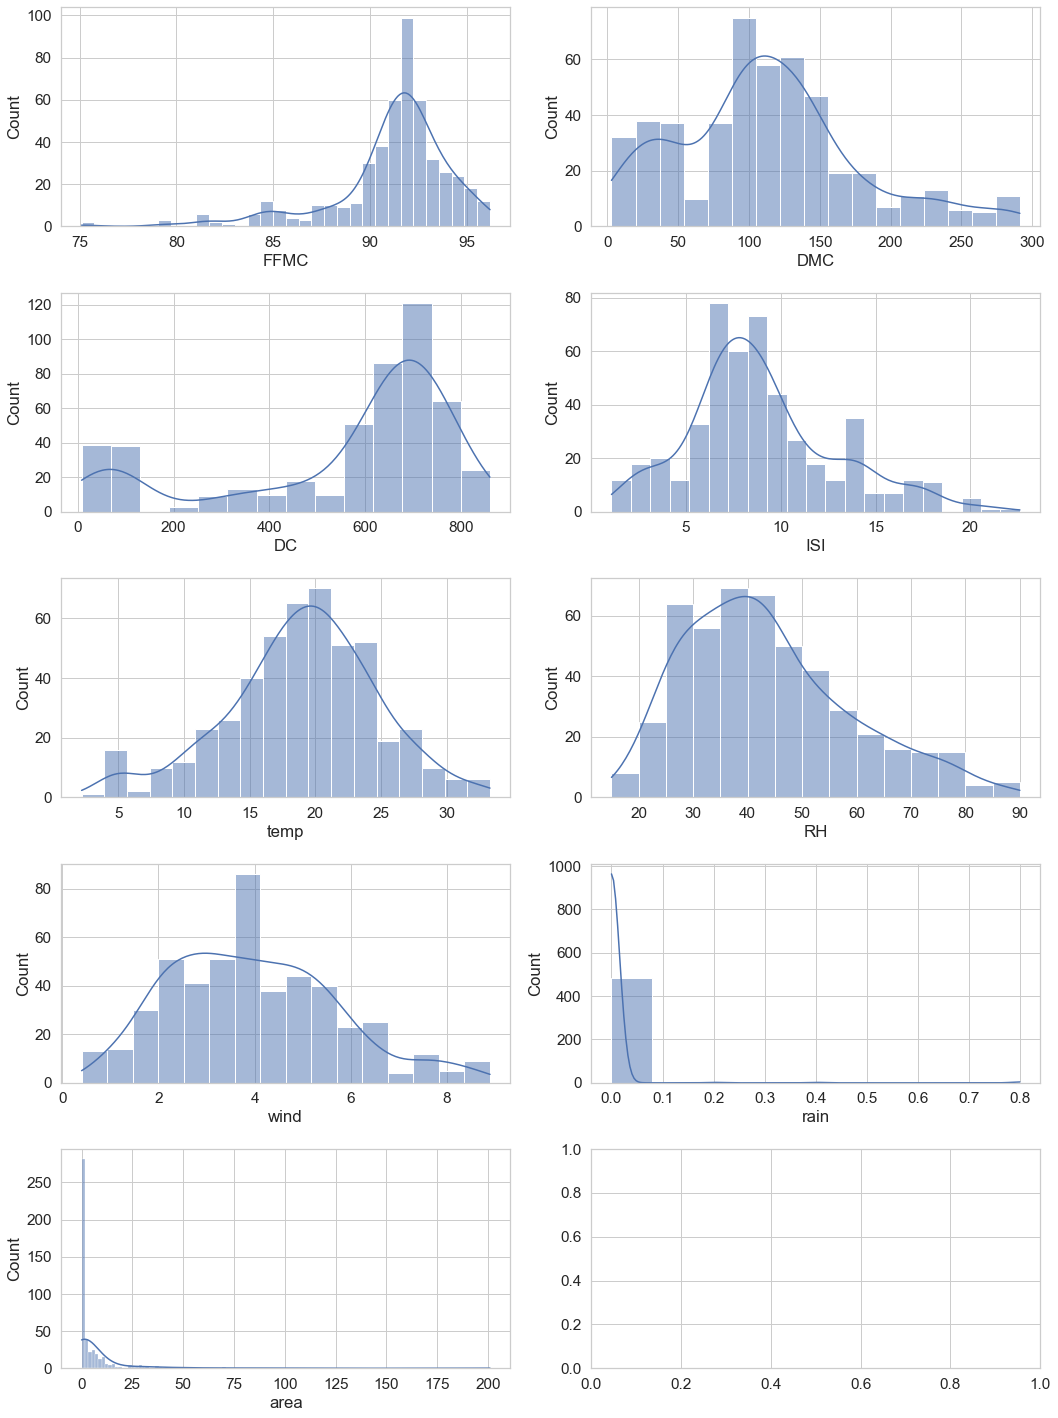

In [577]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = np.ravel(axes)

for i, col in enumerate(col_nums):
    plt.sca(axes[i])
    sns.histplot(data=df_2, x=col, kde=True)
    
plt.tight_layout()
plt.show()

### Before transformation

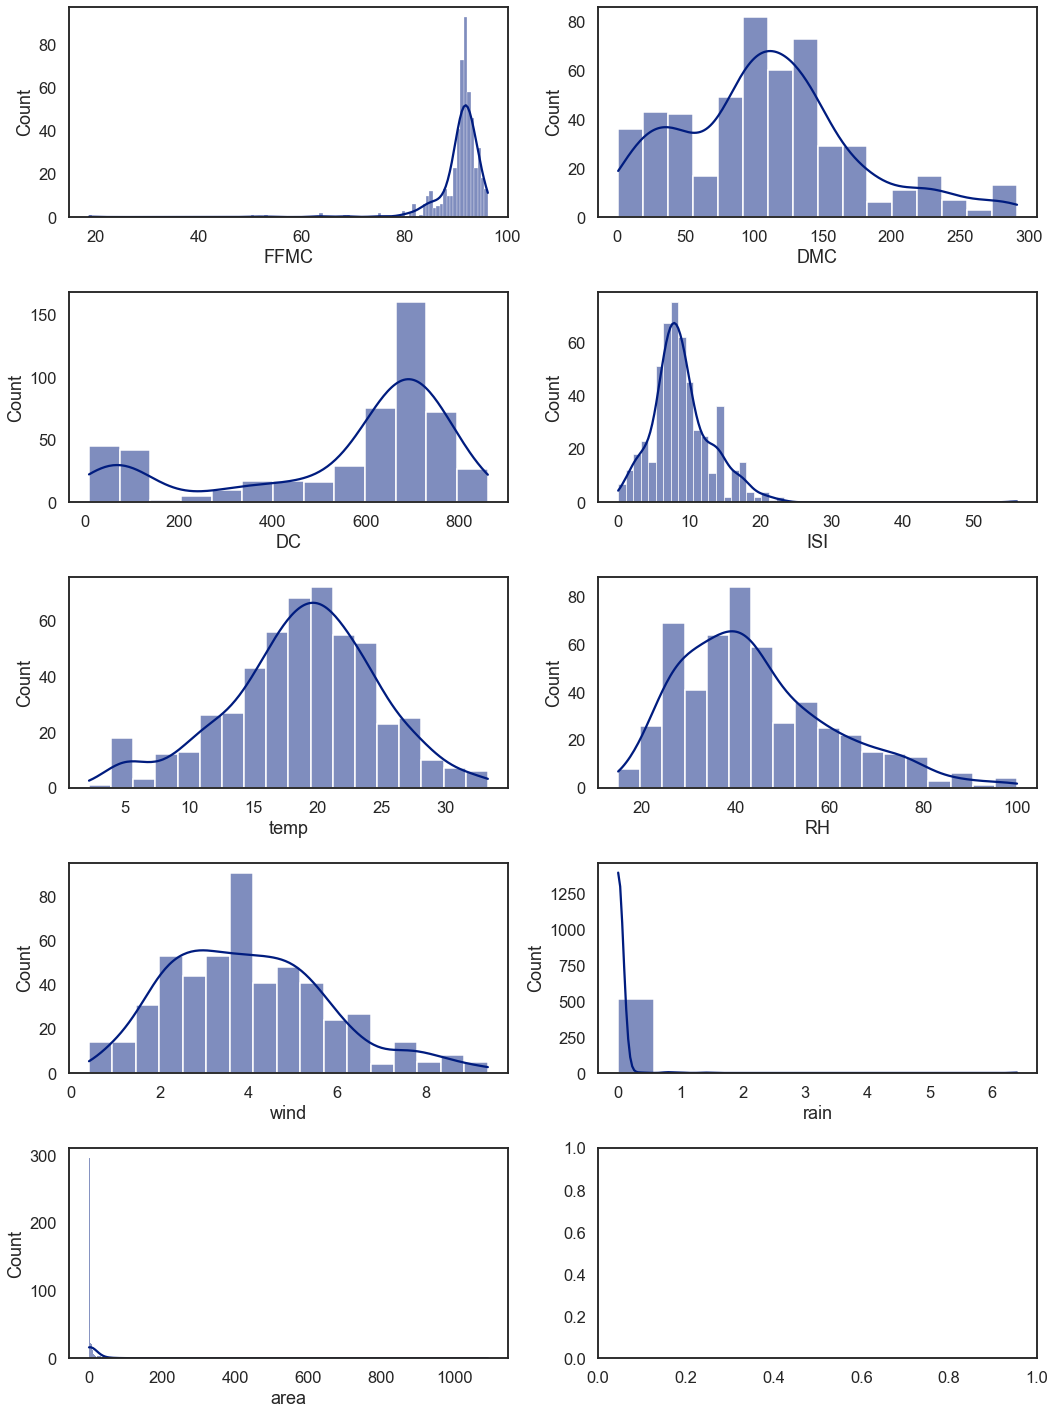

In [1469]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = np.ravel(axes)

for i, col in enumerate(col_nums):
    plt.sca(axes[i])
    sns.histplot(data=df, x=col, kde=True)
    
plt.tight_layout()
plt.show()

In [259]:
# There is skewness in most variables or features and thus it is better to remove this through log transformation or other
# methods

### Preprocessing

In [1424]:
df_2 = df.copy()

In [1426]:
df_2.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [1427]:
# > 0.5 or <-0.5
df_2.drop(columns=['DC', 'ISI', 'Y', 'temp'], inplace=True)

One hot encoding for month and day columns

In [1428]:
df_2.head()

,X,month,day,FFMC,DMC,RH,wind,rain,area
0,7,mar,fri,86.2,26.2,51,6.7,0.0,0.0
1,7,oct,tue,90.6,35.4,33,0.9,0.0,0.0
2,7,oct,sat,90.6,43.7,33,1.3,0.0,0.0
3,8,mar,fri,91.7,33.3,97,4.0,0.2,0.0
4,8,mar,sun,89.3,51.3,99,1.8,0.0,0.0


In [1332]:
df_2['X and Y'] = df_2['X'] * df_2['Y']

In [1334]:
# > 0.5 or <-0.5
df_2.drop(columns=['DC', 'ISI', 'Y', 'X', 'temp'], inplace=True)

In [1335]:
# Removing all outliers from the data
# Most of the code is copied from Sharma (2018) 
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# The first step is to find the z-score (number of standard deviations above or below the mean), take the absolute value
# and wherever the values of z are less than 3 standard deviations, only keep these in the dataframe
# The precaution taken is getting only the numeric data where the coding information is taken from Overmeire (2012)
# https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe
from scipy import stats
z = np.abs(stats.zscore(df_2._get_numeric_data()))
df_2 = df_2[(z < 4).all(axis=1)]

In [1336]:
df_3 = df_2.copy()

In [1337]:
df_3 = pd.get_dummies(df_3, drop_first=True)

In [1338]:
df_3.columns

Index(['FFMC', 'DMC', 'RH', 'wind', 'rain', 'area', 'X and Y', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [1339]:
# Normalize the data or remove skewness
skew_lim = 0.75
skew_vals = df_3.skew()

In [1340]:
skew_cols = skew_vals.sort_values(ascending=False).to_frame().rename(columns={0: 'Skew'}).query('abs(Skew) > {}'.format(skew_lim))
skew_cols

,Skew
month_jan,22.360680
month_nov,22.360680
month_may,15.763692
rain,11.669805
month_dec,7.272621
month_oct,5.526972
month_jun,5.334198
area,5.290287
month_feb,5.158148
month_jul,3.873815


In [1341]:
skew_cols = skew_vals.sort_values(ascending=False).to_frame().rename(columns={0: 'Skew'}).query('abs(Skew) > {}'.format(skew_lim))

for col in skew_cols.index.tolist():
    if col == 'area':
        continue
    df_3[col] = np.log1p(df_3[col])        

### Perform Vanilla Linear Regression

In [1342]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [1343]:
from sklearn.linear_model import LinearRegression

In [1344]:
y = df_3['area']
X = df_3.drop(columns=['area'])

In [1345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)

In [1346]:
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
print(linearRegression_rmse)

1.3272993290092858


In [1347]:
linearRegression.feature_names_in_

array(['FFMC', 'DMC', 'RH', 'wind', 'rain', 'X and Y', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype=object)

In [1348]:
df_importances = pd.DataFrame(zip(linearRegression.feature_names_in_,
                 linearRegression.coef_,
))

In [1349]:
df_importances.sort_values(by=1)

,0,1
0,FFMC,-3.523975e+00
14,month_nov,-2.635289e+00
4,rain,-2.431876e+00
12,month_mar,-8.445044e-01
11,month_jun,-6.269753e-01
15,month_oct,-5.587057e-01
6,month_aug,-2.817579e-01
2,RH,-2.205381e-01
20,day_thu,-2.071285e-01
8,month_feb,-1.592595e-01


In [1350]:
# Most importance features include FFMC, Month of January, DC, November, Thursday, Wednesday, Rain, March, Aug, Jul, Tue, 
# Feb, Sep, Jun, Oct, Saturday, December, May

In [1351]:
from sklearn.metrics import r2_score
r2_score(linearRegression.predict(X_test), y_test) # Very low r2_score and hence a bad model

-8.413963048088135

In [1352]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
spearman = spearmanr(y_test, linearRegression.predict(X_test))
pearson = pearsonr(y_test, linearRegression.predict(X_test))
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data Spearman correlation: 0.0772
Test data Pearson correlation: 0.147


[Text(0.5, 0, 'Predicted Values')]

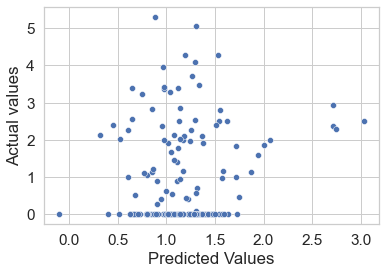

In [1353]:
y_pred = linearRegression.predict(X_test)
s = sns.scatterplot(y_pred, y_test)
s.set(ylabel='Actual values')
s.set(xlabel='Predicted Values')

A low R-squared value indicates that our independent variables do not explain much in the variation of our dependent variable 

### Without using log transformation

In [1354]:
df_3 = df_2.copy()
df_3 = pd.get_dummies(df_3, drop_first=True)
y = df_3['area']
X = df_3.drop(columns=['area'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
print(linearRegression_rmse)
print(r2_score(linearRegression.predict(X_test), y_test))

1.330864565354242
-8.326195427298288


In [1355]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
spearman = spearmanr(y_test, linearRegression.predict(X_test))
pearson = pearsonr(y_test, linearRegression.predict(X_test))

In [1356]:
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data Spearman correlation: 0.0693
Test data Pearson correlation: 0.14


In [1357]:
y_pred = linearRegression.predict(X_test)

[Text(0.5, 0, 'Predicted Values')]

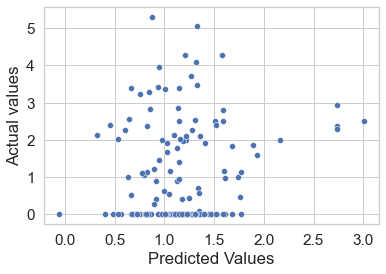

In [1358]:
s = sns.scatterplot(y_pred, y_test)
s.set(ylabel='Actual values')
s.set(xlabel='Predicted Values')

In [1359]:
# around the same score and values and hence normalizing the variables do not make much of a difference
# All useless models above

## Will add polynomial features, scaling and lasso, ridge and elasticnet regression

### Lasso Regression with log transformation

In [1360]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

**Note:** We use `include_bias=False` since `Lasso` includes a bias by default.

In [1361]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X) 

In [1362]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)
y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)

In [1363]:
from sklearn.linear_model import LassoCV

In [1364]:
alphas2 = np.array([1e-5, 5e-3, 0.01, 0.1, 1, 2, 4])

In [1365]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [1366]:
lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train_s, y_train)

y_pred = lassoCV.predict(X_test_s)
r2_score(y_pred, y_test)

0.0

In [1367]:
lassoCV.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
        0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
        0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,
        0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,
        0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,
       -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,
       -0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0.,
       -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [1368]:
y_pred = lassoCV.predict(X_test_s)
r2_score(y_pred, y_test)

0.0

In [1369]:
lassoCV.alpha_

4.0

In [1370]:
rmse(y_test, y_pred)

1.3260098336882178

In [1371]:
# mean absolute deviation
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.1257780861350273

### Elastic Net Regression

In [1372]:
from sklearn.linear_model import ElasticNetCV
l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train_s, y_train)

rmse(y_test, elasticNetCV.predict(X_test_s))

1.3196431253983207

In [1373]:
elasticNetCV.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.00279336,
        0.0014196 , -0.        ,  0.01926024,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.00492038,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.00266587,  0.        , -0.        ,
        0.01951733,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.00491827,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.01766485,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.00491875,  0.        ,
       -0.        ,  0.03387229, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.  

In [1374]:
r2_score(y_test, elasticNetCV.predict(X_test_s))

-0.0031032993103305984

In [1375]:
elasticNetCV.alpha_

1.0

In [1376]:
elasticNetCV.l1_ratio_

0.1

### Ridge Regression

In [1377]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)
y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)


s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [1378]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train_s, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test_s))

print(ridgeCV.alpha_, ridgeCV_rmse)

80.0 1.4055527679659585


In [1379]:
ridgeCV.coef_

array([-0.00923026,  0.05030943, -0.00815922, -0.01717189, -0.02019558,
        0.02394259, -0.02383866,  0.02475925,  0.02222342, -0.00444413,
       -0.00640813, -0.00334875, -0.0404299 ,  0.02100693,  0.        ,
       -0.01219481,  0.03343172,  0.0391546 ,  0.01034417,  0.02842249,
        0.00320055,  0.00673379, -0.0018335 , -0.00456559,  0.05428292,
       -0.02321311, -0.0214963 , -0.02048062,  0.02496253, -0.033274  ,
        0.02500611,  0.01945998, -0.00444413, -0.00440519, -0.00224629,
       -0.04539875,  0.02100693,  0.        , -0.00120271,  0.04090184,
        0.04362419,  0.01065262,  0.00873383,  0.00033145,  0.02920551,
       -0.00704821,  0.00047188,  0.01329581,  0.02421928, -0.01748082,
        0.0011166 , -0.08498372,  0.02331786, -0.14910946, -0.00444413,
        0.05853745, -0.07202366,  0.01811607,  0.02100693,  0.        ,
        0.05087769,  0.14963362, -0.0100479 , -0.05893452, -0.05911555,
       -0.08195019,  0.10264977,  0.09336973, -0.00286038,  0.04

In [1380]:
r2_score(y_test, ridgeCV.predict(X_test_s))

-0.13795992769272858

### Stochastic Gradient Descent

In [1381]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

In [1382]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1383]:
model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV.alpha_},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
new_r2_score = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-12, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    new_r2_score[modellabel] = r2_score(y_test, SGD.predict(X_test))

In [1384]:
pd.DataFrame(new_r2_score, index=['R2_score'])

,Linear,Lasso,Ridge,ElasticNet
R2_score,-0.134126,-0.13432,-0.134752,-0.134172


In [1385]:
rmse_df = pd.DataFrame(new_rmses, index=['RMSE'])
rmse_df

,Linear,Lasso,Ridge,ElasticNet
RMSE,1.403183,1.403303,1.40357,1.403211


### Advanced solutions Kaggle 

#### Instead of pd.get dummies and separating all categorical columns, map months and days to numerical values

In [1470]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [1474]:
df_22 = df_2.copy()

In [1476]:
# Removing all outliers from the data
# Most of the code is copied from Sharma (2018) 
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# The first step is to find the z-score (number of standard deviations above or below the mean), take the absolute value
# and wherever the values of z are less than 3 standard deviations, only keep these in the dataframe
# The precaution taken is getting only the numeric data where the coding information is taken from Overmeire (2012)
# https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe
from scipy import stats
z = np.abs(stats.zscore(df_22._get_numeric_data()))
df_22 = df_22[(z < 3).all(axis=1)]

In [1477]:
## Data mapping of categorical features

month_map = {'jan':1, 'feb':2, 'mar':3, 
             'apr':4, 'may':5, 'jun':6, 
             'jul':7, 'aug':8, 'sep':9, 
             'oct':10, 'nov':11, 'dec':12}

day_map = {'mon':1, 'tue':2, 'wed':3,
          'thu':4, 'fri':5, 'sat':6, 'sun':7}

In [1478]:
df_22.month = df_22.month.map(month_map)
df_22.day = df_22.day.map(day_map)

In [1479]:
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 515
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       469 non-null    int64  
 1   month   469 non-null    int64  
 2   day     469 non-null    int64  
 3   FFMC    469 non-null    float64
 4   DMC     469 non-null    float64
 5   RH      469 non-null    int64  
 6   wind    469 non-null    float64
 7   rain    469 non-null    float64
 8   area    469 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 36.6 KB


In [1480]:
# Normalize the data or remove skewness
skew_lim = 0.75
skew_vals = df_22.skew()

skew_cols = skew_vals.sort_values(ascending=False).to_frame().rename(columns={0: 'Skew'}).query('abs(Skew) > {}'.format(skew_lim))

for col in skew_cols.index.tolist():
    if col in ['area']:
        continue
    df_22[col] = np.log1p(df_22[col])    

In [1481]:
y = df_22['area']
X = df_22.drop(columns=['area'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)

linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
print(linearRegression_rmse)
print(r2_score(y_test, linearRegression.predict(X_test))) 

1.2465747651696488
-0.06093722713515737


In [1482]:
df_importances = pd.DataFrame(zip(linearRegression.feature_names_in_,
                 linearRegression.coef_,
))

In [1483]:
df_importances.sort_values(by=1)

,0,1
3,FFMC,-3.694004
5,RH,-0.004200
7,rain,0.000000
4,DMC,0.000964
2,day,0.006840
6,wind,0.051077
0,X,0.054405
1,month,0.499025


[Text(0.5, 0, 'Predicted Values')]

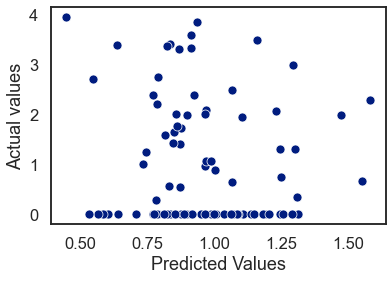

In [1485]:

y_pred = linearRegression.predict(X_test)
s = sns.scatterplot(y_pred, y_test)
s.set(ylabel='Actual values')
s.set(xlabel='Predicted Values')

### Check if errors are normally distributed to be able to use linear regression

In [1486]:
residuals = y_train - linearRegression.predict(X_train)

In [1487]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'residuals')

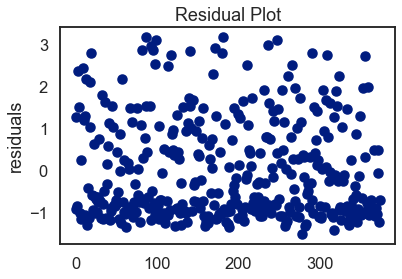

In [1488]:
plt.scatter(np.arange(len(residuals)), residuals)
plt.title('Residual Plot')
plt.ylabel('residuals')

In [1489]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [1490]:
normaltest(residuals)

NormaltestResult(statistic=41.714109205186745, pvalue=8.747748275832606e-10)

Not normal and hence cannot use linear regression

### Lasso

In [1518]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)


alphas2 = np.array([1e-5, 1e-4, 1e-3, 0.01, 0.1, 0.2])
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)


lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train_s, y_train)

y_pred = lassoCV.predict(X_test_s)
print(r2_score(y_test, y_pred))
print(rmse(y_test, y_pred))

-0.0008619403437997164
1.2256526273620627


[Text(0.5, 0, 'Predicted Values')]

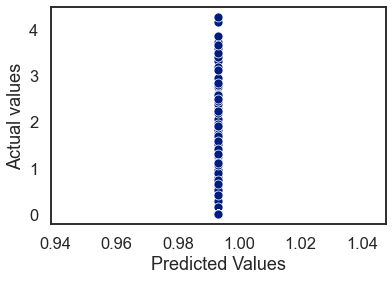

In [1519]:
y_pred = lassoCV.predict(X_test_s)
s = sns.scatterplot(y_pred, y_test)
s.set(ylabel='Actual values')
s.set(xlabel='Predicted Values')

In [1504]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [1505]:
lassoCV.alpha_

0.2

In [1506]:
lassoCV.coef_ 

array([ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.])

In [1508]:
X

,X,month,day,FFMC,DMC,RH,wind,rain
0,7,1.386294,5,4.468204,26.2,51,6.7,0.0
1,7,2.397895,2,4.517431,35.4,33,0.9,0.0
2,7,2.397895,6,4.517431,43.7,33,1.3,0.0
5,8,2.197225,7,4.535820,85.3,29,5.4,0.0
6,8,2.197225,1,4.535820,88.9,27,3.1,0.0
...,...,...,...,...,...,...,...,...
506,1,2.197225,5,4.521789,166.9,73,8.5,0.0
507,2,2.197225,5,4.521789,166.9,41,3.6,0.0
508,1,2.197225,5,4.521789,166.9,41,3.6,0.0
510,6,2.197225,5,4.521789,166.9,62,5.4,0.0


In [1512]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)


best_estimator = Pipeline([
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("scaler", StandardScaler()),
                    ("lasso_regression", Lasso(alpha=0.1))])

y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)

best_estimator.fit(X_train, y_train)
print(best_estimator.score(X_test, y_test))
print(rmse(y_test, best_estimator.predict(X_test)))

0.0032979898301287447
1.2231028559603883


In [1407]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [1408]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [1409]:
col_names_dict

{0: 'X',
 1: 'Y',
 2: 'month',
 3: 'day',
 4: 'FFMC',
 5: 'DMC',
 6: 'DC',
 7: 'ISI',
 8: 'temp',
 9: 'RH',
 10: 'wind',
 11: 'rain'}

In [1410]:
df_importances.sort_values(by=1)

,0,1
0,1,0.000000
65,x5 x7,0.000000
64,x5 x6,-0.000000
63,x5^2,-0.000000
62,x4 x11,-0.000000
...,...,...
24,x0 x11,-0.000000
32,x1 x8,0.000000
26,x1 x2,0.000236
44,x2 x10,0.019156


In [1411]:
y_pred = best_estimator.predict(X_test)
print(rmse(y_pred, y_test))

1.343759018946885


In [1412]:
r2_score(y_test, y_pred)

-0.00011966159172649427

In [1413]:
len(lassoCV.coef_ )

90

NormaltestResult(statistic=42.87745670694334, pvalue=4.889659046768966e-10)


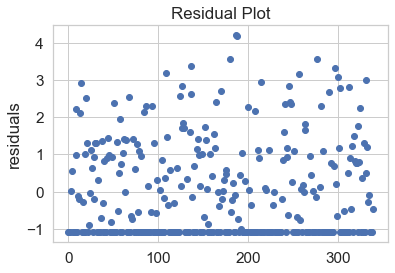

In [1414]:
residuals = y_train - lassoCV.predict(X_train_s)
plt.scatter(np.arange(len(residuals)), residuals)
plt.title('Residual Plot')
plt.ylabel('residuals')

print(normaltest(residuals))

In [1415]:
# Not normal and hence cannot use linear regression to predict

### Ridge

In [1514]:
from sklearn.linear_model import RidgeCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)

alphas = [0.0005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80, 100, 200]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=5).fit(X_train_s, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test_s))

print(ridgeCV.alpha_, ridgeCV_rmse)

200.0 1.219520581384557


[Text(0.5, 0, 'Predicted Values')]

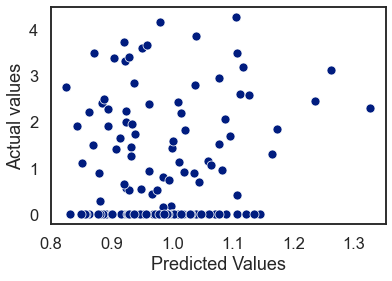

In [1517]:
y_pred = ridgeCV.predict(X_test_s)
s = sns.scatterplot(y_pred, y_test)
s.set(ylabel='Actual values')
s.set(xlabel='Predicted Values')

In [1515]:
print(r2_score(y_test, ridgeCV.predict(X_test_s)))

0.009127804709520237


NormaltestResult(statistic=37.985427293276764, pvalue=5.643769482963363e-09)


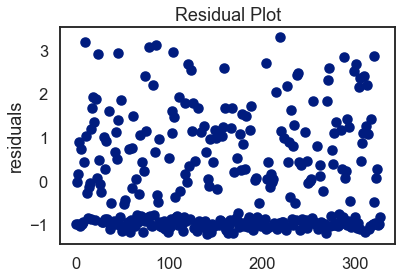

In [1516]:
residuals = y_train - ridgeCV.predict(X_train_s)
plt.scatter(np.arange(len(residuals)), residuals)
plt.title('Residual Plot')
plt.ylabel('residuals')

print(normaltest(residuals))

### Elastic Net

In [1521]:
from sklearn.linear_model import ElasticNetCV
l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train_s, y_train)

rmse(y_test, elasticNetCV.predict(X_test_s))

1.2256526273620627

In [1522]:
print(r2_score(y_test, elasticNetCV.predict(X_test_s)))

-0.0008619403437997164


NormaltestResult(statistic=38.50045744490481, pvalue=4.362464345282516e-09)


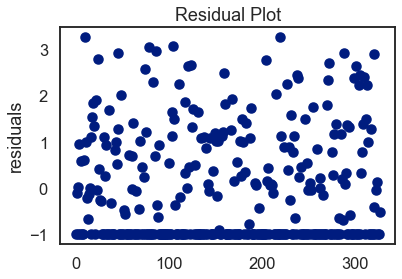

In [1523]:
residuals = y_train - elasticNetCV.predict(X_train_s)
plt.scatter(np.arange(len(residuals)), residuals)
plt.title('Residual Plot')
plt.ylabel('residuals')

print(normaltest(residuals))

In [1524]:
elasticNetCV.coef_

array([ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.])

In [1525]:
mean_absolute_error(y_test, y_pred)

1.0590825623666698

[Text(0.5, 0, 'Predicted Values')]

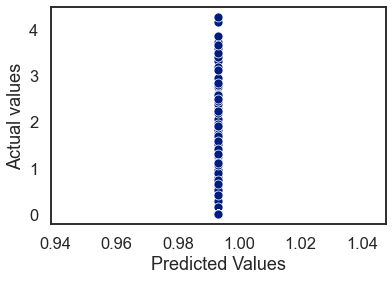

In [1526]:
y_pred = elasticNetCV.predict(X_test_s)
s = sns.scatterplot(y_pred, y_test)
s.set(ylabel='Actual values')
s.set(xlabel='Predicted Values')